In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
#Kết nối gg drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/baitaplon/diabetes_data_upload.csv')

In [4]:
#Hiển thị thuộc tính các cột trong data
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
#Hiển thị 5 hàng đầu tiên của data
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
print("Dữ liệu gốc:", df.shape)

Dữ liệu gốc: (520, 17)


In [7]:
df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

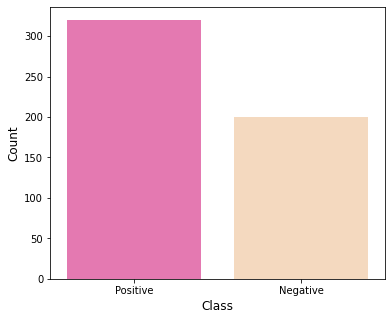

In [ ]:
#Visualize mô hình đếm số lượng nguy cơ bị bệnh theo hướng tích cực và tiêu cực  trong data
count = df['class'].value_counts()
fig = plt.figure(figsize=(15,10))
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="Accent_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('')
#plt.savefig("count_class.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


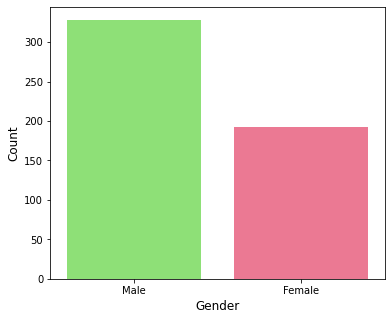

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Gender'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title('')
#plt.savefig("count_class.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


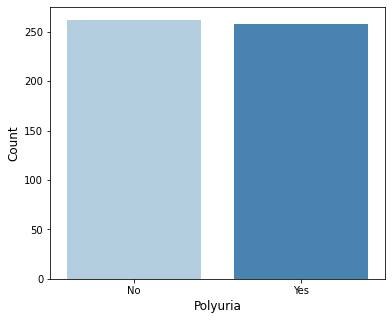

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Polyuria'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Blues")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Polyuria', fontsize=12)
plt.title('')
#plt.savefig("count_bruises.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


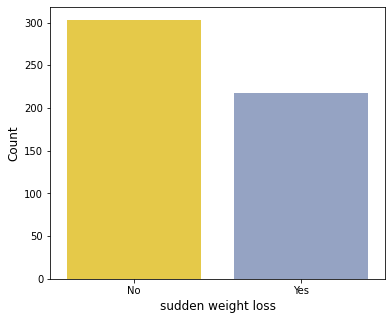

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['sudden weight loss'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('sudden weight loss', fontsize=12)
plt.title('')
#plt.savefig("count_gill_attachment.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


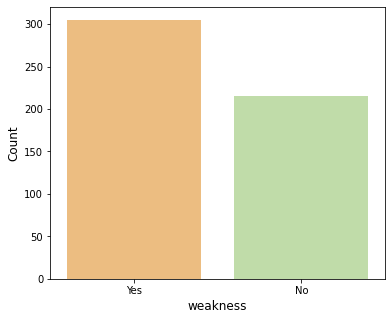

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['weakness'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('weakness', fontsize=12)
plt.title('')
#plt.savefig("count_gill_size.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


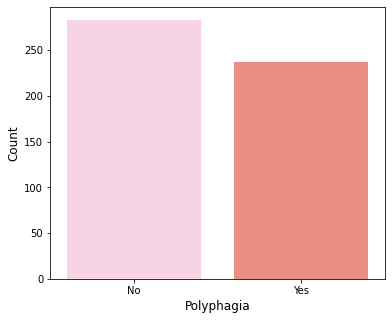

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Polyphagia'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set3_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Polyphagia', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


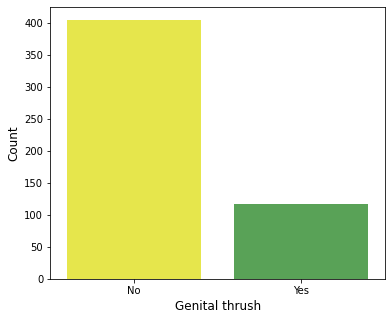

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Genital thrush'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genital thrush', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


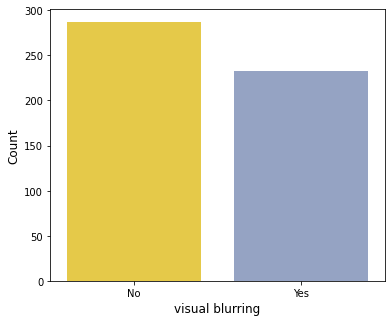

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['visual blurring'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('visual blurring', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


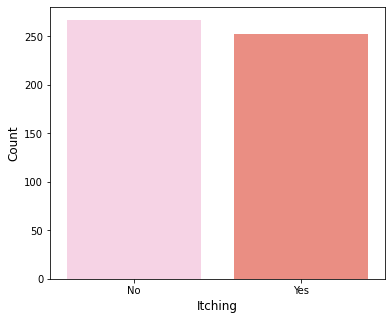

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Itching'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set3_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Itching', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


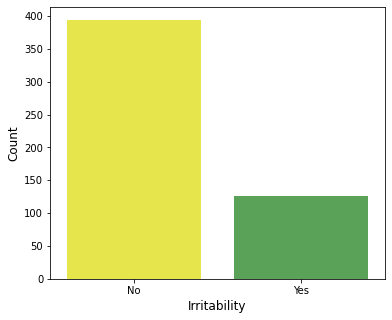

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Irritability'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Irritability', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


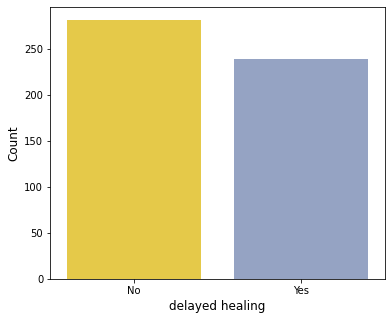

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['delayed healing'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('delayed healing', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


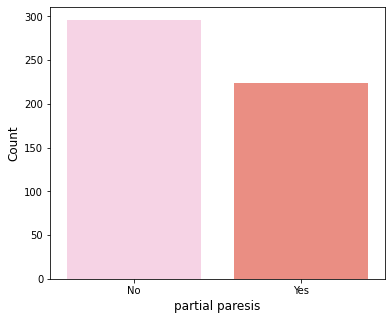

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['partial paresis'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set3_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('partial paresis', fontsize=12)
plt.title('')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


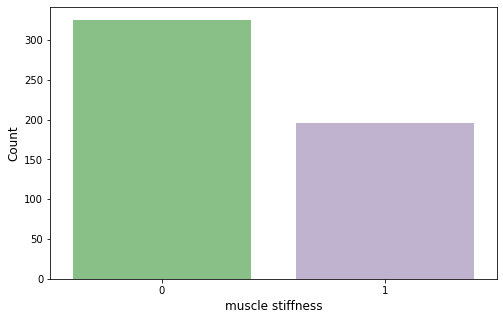

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['muscle stiffness'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(8,5))
sns.barplot(count.index, count.values, alpha=1, palette="Accent")
plt.ylabel('Count', fontsize=12)
plt.xlabel('muscle stiffness', fontsize=12)
plt.title('')
#plt.savefig("count_cap_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


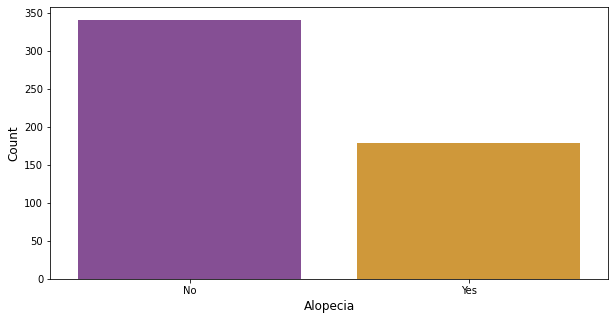

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Alopecia'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.9, palette="CMRmap")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Alopecia', fontsize=12)
plt.title('')
#plt.savefig("count_gill_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


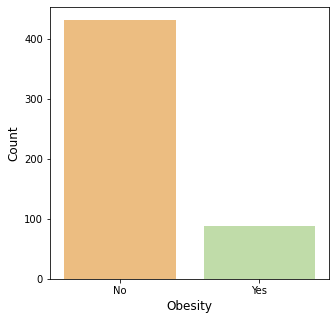

In [ ]:
#Visualize mô hình đếm số lượng 
count = df['Obesity'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Obesity', fontsize=12)
plt.title('')
#plt.savefig("count_stalk_root.jpeg", format='jpeg', dpi=100)
plt.show()

In [8]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [9]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
mappings = list()
encoder = LabelEncoder()
for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [10]:
#Biến đổi chữ thành số tương ứng
mappings

[{0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1}]

In [11]:
#Xem số liệu sau khi mã hóa data
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,23.905769,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,11.754586,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.head()
#df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [13]:
#Kiểm tra cột veil-type
df['Age']

0      16
1      34
2      17
3      21
4      36
       ..
515    15
516    24
517    34
518     8
519    18
Name: Age, Length: 520, dtype: int64

In [14]:
#Loại bỏ cột veil-type khỏi tập dữ liệu đang xét
df=df.drop(["Age"],axis=1)

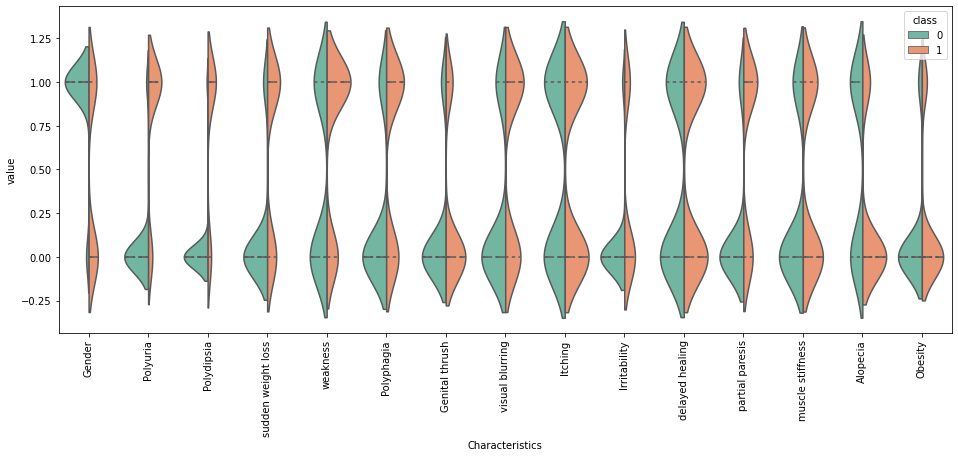

In [15]:
#Visualize biểu đồ Violin
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set2')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

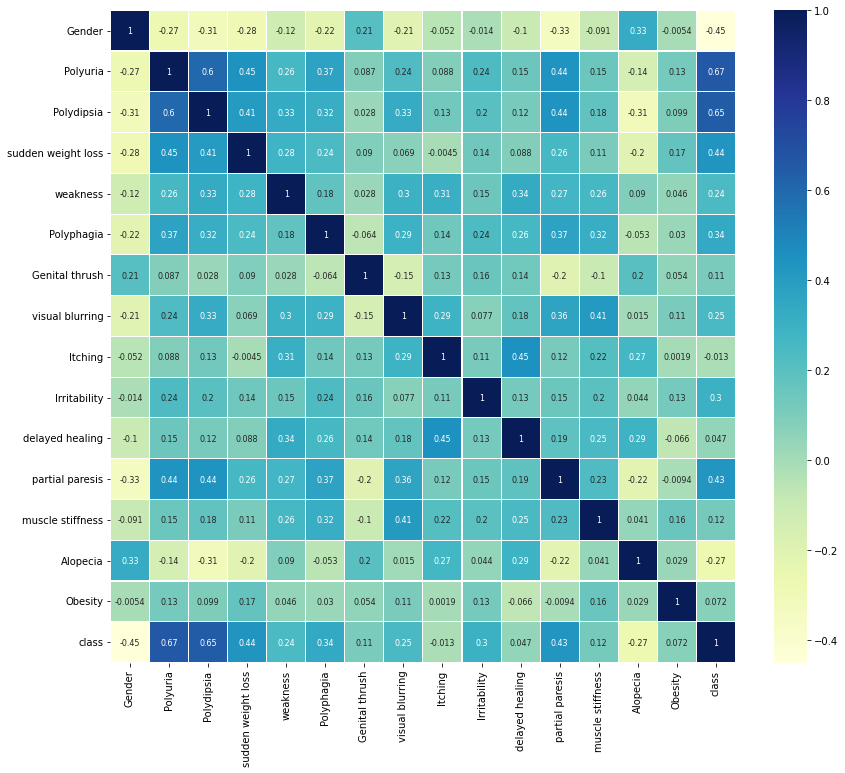

In [16]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=10001000, bbox_inches='tight')
plt.show()

Cây Quyết định

In [17]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = df.drop(['class'], axis=1)  
Y = df["class"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y,random_state=42, test_size=0.3) #train 70% - test 30%

In [18]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

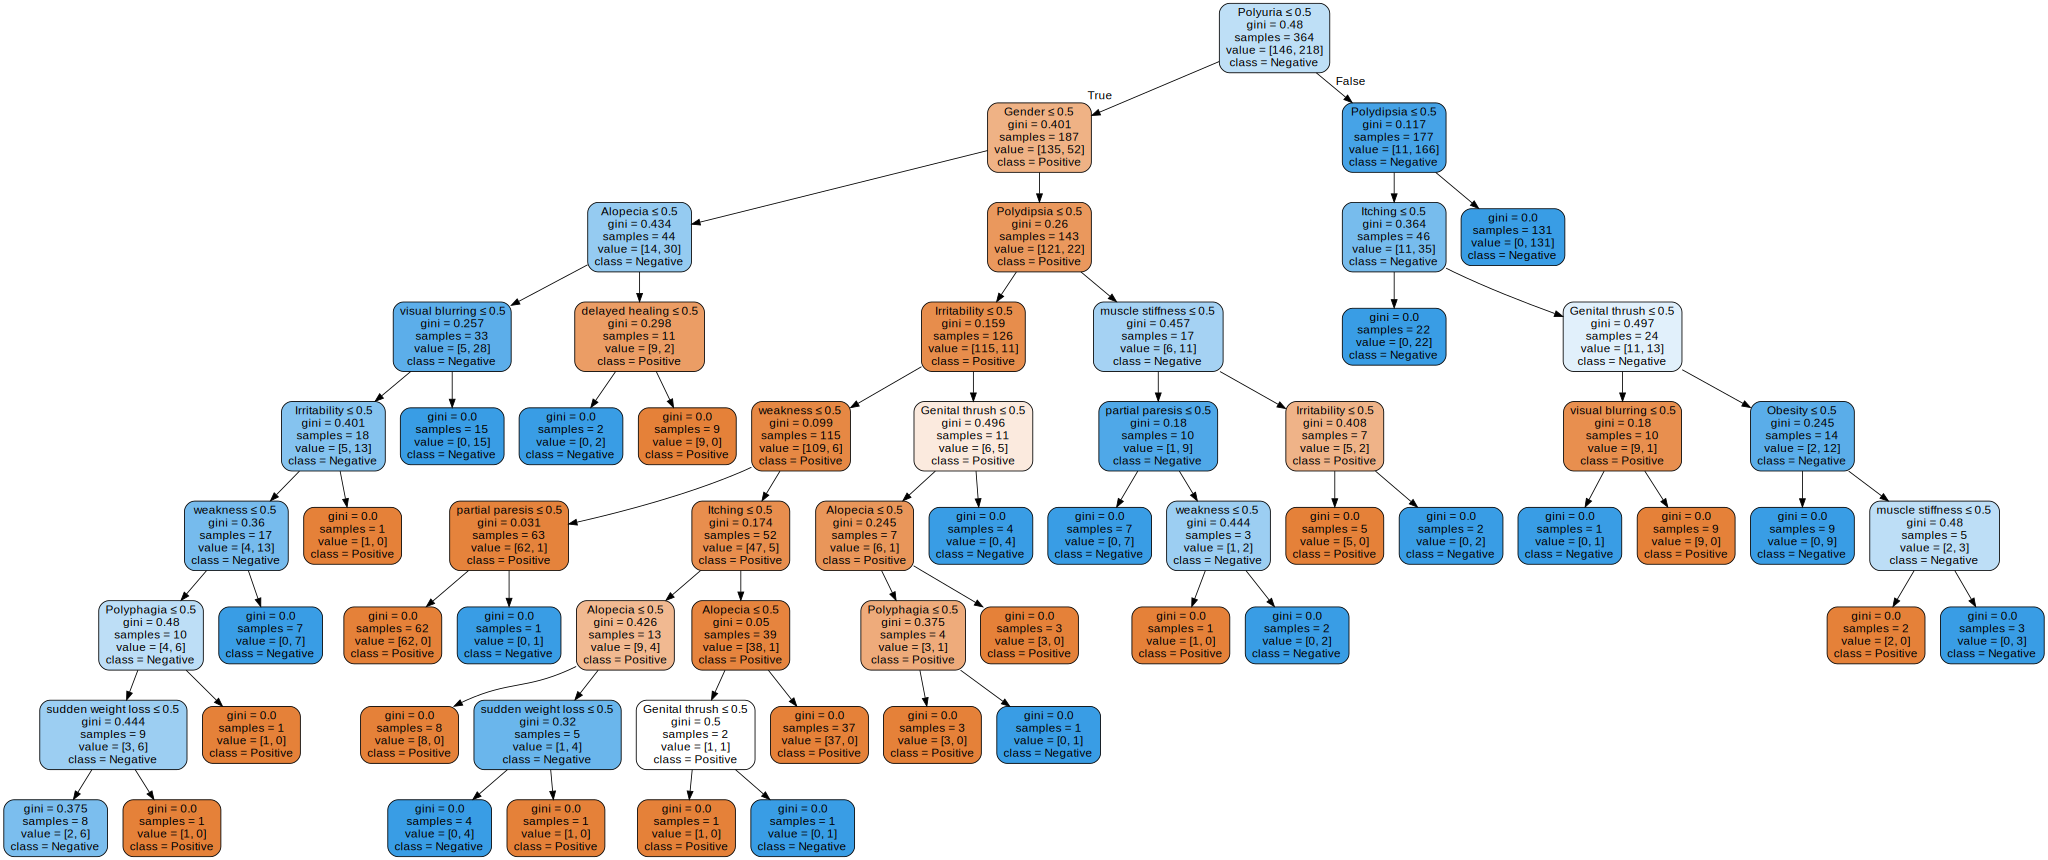

In [19]:
#max_depth: default=None
#Chương trình chạy đến nút cuối cùng 
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import tree
Y_name = ['Positive','Negative']
clf = DecisionTreeClassifier( 
    criterion='gini', 
    splitter='best', 
    max_depth=None, #độ sâu của cây , khi = none sẽ là max 
    min_samples_split=2, #số lượng tối thiểu của nút nội bộ 
    min_samples_leaf=1, #Số lượng mẫu tối thiểu cần thiết để có ở một nút
    min_weight_fraction_leaf=0.0, #Phần có trọng số tối thiểu của tổng trọng số 
    max_features=None, #Số lượng các tính năng cần xem xét khi tìm kiếm sự phân chia tốt nhất
    random_state=None, #Kiểm soát tính ngẫu nhiên của công cụ ước tính.
    max_leaf_nodes=None,#các nút tốt nhất 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
            )
clf.fit(X_train_dt, Y_train_dt)
Y_pred_dt = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph 

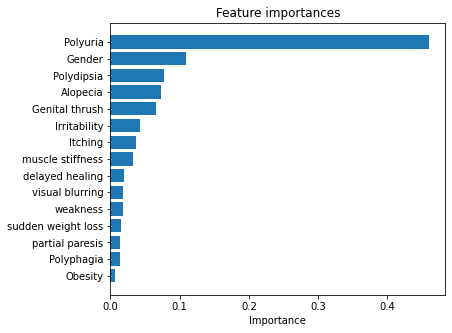

In [20]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu 
features_list = X_dt.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dt)))
res = cross_val_score(clf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test_dt,clf.predict(X_test_dt))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(clf.score(X_test_dt, Y_test_dt)*100, 2)))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99       102

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156


Average Accuracy:	0.9042

Standard Deviation:	0.0759

Confusion Matrix:
[[ 53   1]
 [  1 101]]

Accuracy Score:		98.72%


Xử lý dữ liệu 

In [22]:
X=pd.get_dummies(X_dt,columns=X_dt.columns,drop_first=True)
X.head()

,Gender_1,Polyuria_1,Polydipsia_1,sudden weight loss_1,weakness_1,Polyphagia_1,Genital thrush_1,visual blurring_1,Itching_1,Irritability_1,delayed healing_1,partial paresis_1,muscle stiffness_1,Alopecia_1,Obesity_1
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Chia dữ liệu thành các nhóm train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #70% training and 30% test
#Chuẩn hóa tập dữ liệu x_train và x_test
sc = preprocessing.StandardScaler().fit(X_train)
X_scaled = sc.transform(X)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
print(X_dt)

     Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0         1         0           1                   0         1           0   
1         1         0           0                   0         1           0   
2         1         1           0                   0         1           1   
3         1         0           0                   1         1           1   
4         1         1           1                   1         1           1   
..      ...       ...         ...                 ...       ...         ...   
515       0         1           1                   1         0           1   
516       0         1           1                   1         1           1   
517       0         1           1                   1         1           1   
518       0         0           0                   0         1           0   
519       1         0           0                   0         0           0   

     Genital thrush  visual blurring  Itching  Irri

In [25]:
print(X)

     Gender_1  Polyuria_1  Polydipsia_1  sudden weight loss_1  weakness_1  \
0           1           0             1                     0           1   
1           1           0             0                     0           1   
2           1           1             0                     0           1   
3           1           0             0                     1           1   
4           1           1             1                     1           1   
..        ...         ...           ...                   ...         ...   
515         0           1             1                     1           0   
516         0           1             1                     1           1   
517         0           1             1                     1           1   
518         0           0             0                     0           1   
519         1           0             0                     0           0   

     Polyphagia_1  Genital thrush_1  visual blurring_1  Itching_1  \
0     

In [26]:
#Cột class
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [27]:
#PCA giảm chiều dữ liệu
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

In [28]:
#Visualize mô hình dữ liệu Data Mushrooms bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X_scaled
X_pca = pca.fit_transform(X_scaled)
e_x = X_pca[(Y==0)]
p_x = X_pca[(Y==1)]

In [29]:
#Visualize 2 mô hình dữ liệu train và test sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X_train_scaled
e_train = X_train_pca[(Y_train==0)]
p_train = X_train_pca[(Y_train==1)]

#X_test_scaled
e_test = X_test_pca[(Y_test==0)]
p_test = X_test_pca[(Y_test==1)]

In [30]:
#Visualize mô hình dữ liệu Train Data sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Giảm chiều dữ liệu
e_train = X_train_pca[(Y_train==0)]
p_train = X_train_pca[(Y_train==1)]

In [31]:
#Visualize mô hình dữ liệu Test Data sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Giảm chiều dữ liệu
e_test = X_test_pca[(Y_test==0)]
p_test = X_test_pca[(Y_test==1)]


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [33]:
Y_pred_dt = dt.predict(X_test_pca)

In [34]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_dt)))
res = cross_val_score(dt, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,dt.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.94      0.95      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156


Average Accuracy:	0.8863

Standard Deviation:	0.0874

Confusion Matrix:
[[48  6]
 [ 5 97]]

Accuracy Score:		92.95%


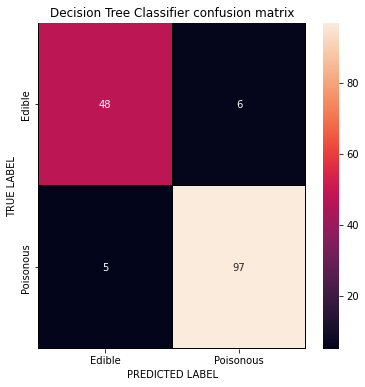

In [35]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(Y_test, Y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

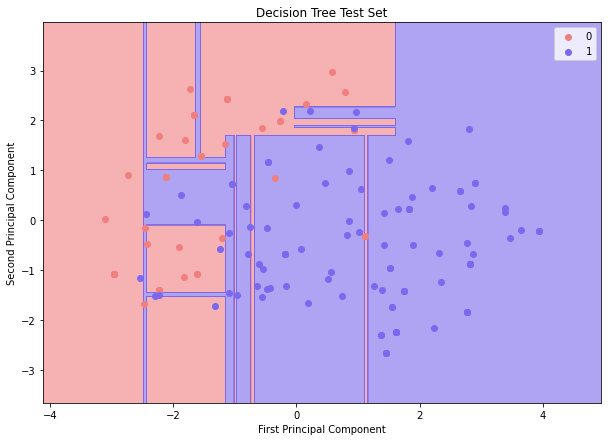

In [36]:
#Visualize mô hình Decision Tree Test Set
#dt_pca = DT()
#dt_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("dt_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

Thuật toán SVM

In [37]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca,Y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [38]:
Y_pred_svm = svm.predict(X_test_pca)

In [39]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Support Vector Machines report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,svm.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(svm.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Support Vector Machines report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        54
           1       0.95      0.89      0.92       102

    accuracy                           0.90       156
   macro avg       0.88      0.90      0.89       156
weighted avg       0.90      0.90      0.90       156


Average Accuracy:	0.8850

Standard Deviation:	0.0671

Confusion Matrix:
[[49  5]
 [11 91]]

Accuracy Score:		89.74%


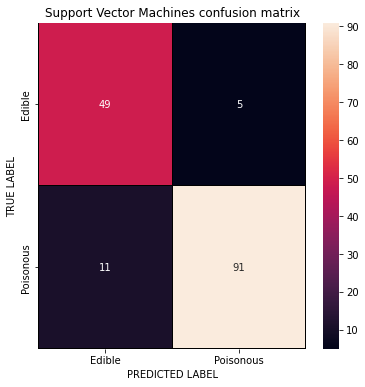

In [40]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_svm = confusion_matrix(Y_test, Y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_svm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Support Vector Machines confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("svmcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

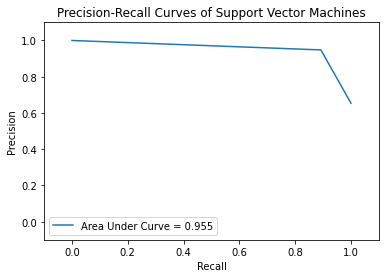

In [41]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_svm)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

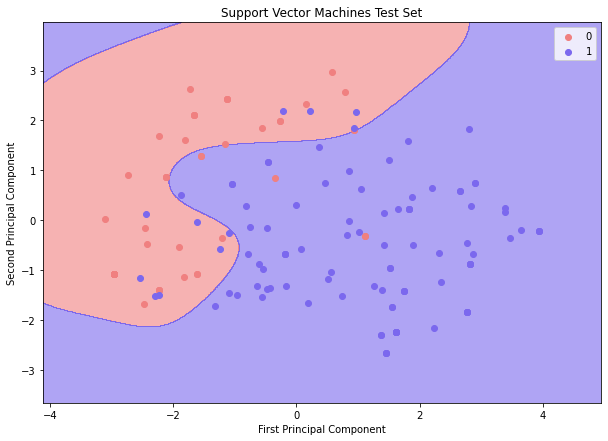

In [42]:
#Visualize mô hình Support Vector Machines Test Set
#svm_pca = SVC()
#svm_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machines Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("svm_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

So Sánh thuật toán 

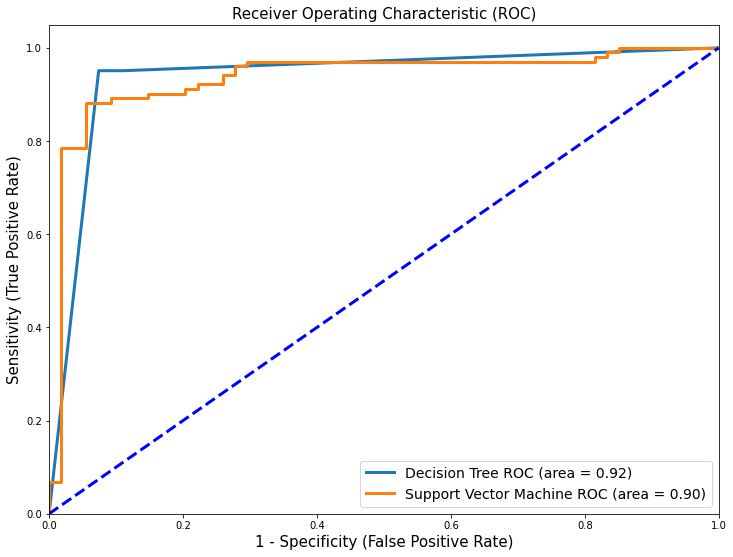

In [43]:
#Visualize mô hình ROC (Receiver Operating Characteristic) Curves - so sánh trực quan các mô hình phân loại
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

plt.figure(figsize=(12,9))
models = [
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
}

]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, Y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(Y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
#plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
plt.show()